In [1]:
import cartopy
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
np.set_printoptions(suppress=True)

In [3]:
file_in = 'RSM97.PLEV.202103.DAILY.nc'  # Modelo Regional RSM97

In [4]:
with xr.open_dataset(file_in) as dset:
    print(dset)
    pcp = dset['pcp']  # DataArray

<xarray.Dataset>
Dimensions:    (time: 31, longitude: 109, latitude: 72)
Coordinates:
  * time       (time) datetime64[ns] 2021-03-01 2021-03-02 ... 2021-03-31
  * longitude  (longitude) float64 -55.64 -55.1 -54.56 ... 1.603 2.143 2.683
  * latitude   (latitude) float64 -21.4 -20.89 -20.39 ... 15.19 15.71 16.23
Data variables:
    pcp        (time, latitude, longitude) float32 ...
    pcpc       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  COARDS
    calendar:     standard
    comments:     File
    model:        geos/das
    center:       gsfc


In [5]:
# pcp é um DataArray: type(pcp)
pcp

<xarray.DataArray 'pcp' (time: 31, latitude: 72, longitude: 109)>
[243288 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2021-03-01 2021-03-02 ... 2021-03-31
  * longitude  (longitude) float64 -55.64 -55.1 -54.56 ... 1.603 2.143 2.683
  * latitude   (latitude) float64 -21.4 -20.89 -20.39 ... 15.19 15.71 16.23
Attributes:
    comments:           Unknown1 variable comment
    long_name:          rainfall
    units:              
    grid_name:          grid01
    grid_type:          generic
    level_description:  Earth surface
    time_statistic:     instantaneous

### Fatiando como Numpy Arrays

In [6]:
# primeiro passo de tempo
pcp[0, 10, 10]  # ou pcp[0, :, :]

<xarray.DataArray 'pcp' ()>
array(10.124048)
Coordinates:
    time       datetime64[ns] 2021-03-01
    longitude  float64 -50.24
    latitude   float64 -16.29
Attributes:
    comments:           Unknown1 variable comment
    long_name:          rainfall
    units:              
    grid_name:          grid01
    grid_type:          generic
    level_description:  Earth surface
    time_statistic:     instantaneous

In [7]:
# último passo de tempo
pcp[-1, 40, 40]  # ou pcp[-1, :, :]

<xarray.DataArray 'pcp' ()>
array(2.643968)
Coordinates:
    time       datetime64[ns] 2021-03-31
    longitude  float64 -34.04
    latitude   float64 -0.3
Attributes:
    comments:           Unknown1 variable comment
    long_name:          rainfall
    units:              
    grid_name:          grid01
    grid_type:          generic
    level_description:  Earth surface
    time_statistic:     instantaneous

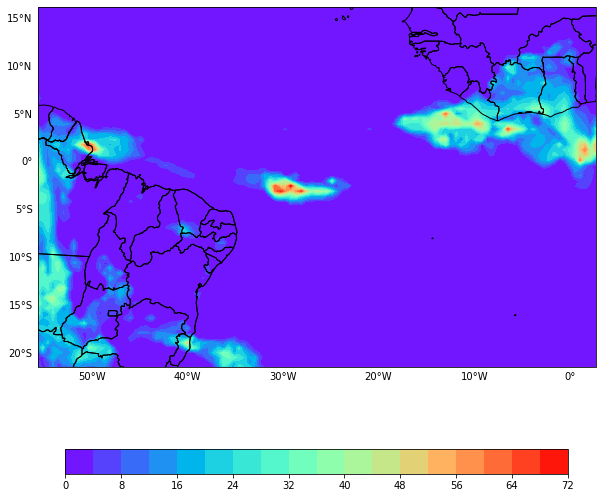

In [8]:
# plot 

fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=cartopy.crs.PlateCarree())

# Toda a grade
plt.contourf(
    pcp.longitude,
    pcp.latitude,
    pcp[-1, :, :],
    20,
    transform=cartopy.crs.PlateCarree(),
    cmap=plt.cm.rainbow
)

# Ceará
# plt.contourf(
#     pcp.longitude[20:40],
#     pcp.latitude[25:38],
#     pcp[-1, 25:38, 20:40],
#     20,
#     transform=cartopy.crs.PlateCarree(),
#     cmap=plt.cm.rainbow
# )

gl = ax.gridlines(
    crs=cartopy.crs.PlateCarree(),
    draw_labels=True,
    linewidth=0.01
)

gl.top_labels = False
gl.right_labels = False

# contorno dos estados
states = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    scale='50m', facecolor='none',
    name='admin_1_states_provinces_shp'
)
ax.add_feature(states, edgecolor='k')

# contorno dos países
countries = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    scale='50m', facecolor='none',
    name='admin_0_countries'
)
ax.add_feature(countries, edgecolor='k')

plt.colorbar(shrink=0.9, orientation='horizontal')

plt.show()

In [9]:
plt.close()

### Selecionando passo de tempo usando índices (isel)

In [10]:
# Usando DataSet
dset.isel(time=1)

<xarray.Dataset>
Dimensions:    (longitude: 109, latitude: 72)
Coordinates:
    time       datetime64[ns] 2021-03-02
  * longitude  (longitude) float64 -55.64 -55.1 -54.56 ... 1.603 2.143 2.683
  * latitude   (latitude) float64 -21.4 -20.89 -20.39 ... 15.19 15.71 16.23
Data variables:
    pcp        (latitude, longitude) float32 ...
    pcpc       (latitude, longitude) float32 ...
Attributes:
    Conventions:  COARDS
    calendar:     standard
    comments:     File
    model:        geos/das
    center:       gsfc

In [11]:
# Usando DataArray
pcp.isel(latitude=10, time=0, longitude=10)

<xarray.DataArray 'pcp' ()>
array(10.124048)
Coordinates:
    time       datetime64[ns] 2021-03-01
    longitude  float64 -50.24
    latitude   float64 -16.29
Attributes:
    comments:           Unknown1 variable comment
    long_name:          rainfall
    units:              
    grid_name:          grid01
    grid_type:          generic
    level_description:  Earth surface
    time_statistic:     instantaneous

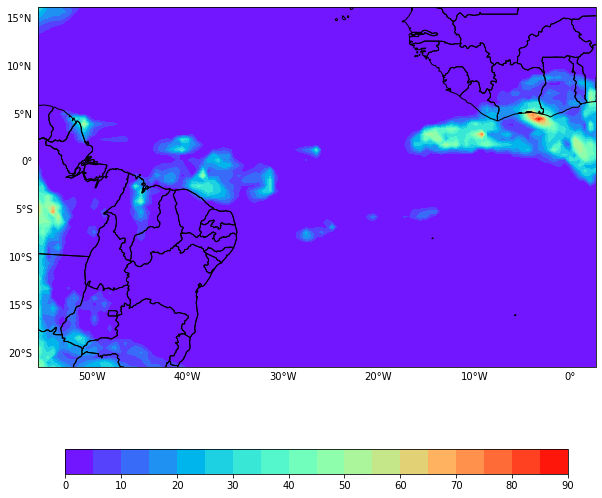

In [12]:
# plot usando isel

fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=cartopy.crs.PlateCarree())

plot_pcp = pcp.isel(time=20)

plt.contourf(
    plot_pcp.longitude,
    plot_pcp.latitude,
    plot_pcp,
    20,
    transform=cartopy.crs.PlateCarree(),
    cmap=plt.cm.rainbow
)

gl = ax.gridlines(
    crs=cartopy.crs.PlateCarree(),
    draw_labels=True,
    linewidth=0.01
)

gl.top_labels = False
gl.right_labels = False

# contorno dos estados
states = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    scale='50m', facecolor='none',
    name='admin_1_states_provinces_shp'
)
ax.add_feature(states, edgecolor='k')

# contorno dos países
countries = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    scale='50m', facecolor='none',
    name='admin_0_countries'
)
ax.add_feature(countries, edgecolor='k')

plt.colorbar(shrink=0.9, orientation='horizontal')

plt.show()

In [13]:
plt.close()

### Selecionando passo do tempo usando strings

In [14]:
dset['time'].values

array(['2021-03-01T00:00:00.000000000', '2021-03-02T00:00:00.000000000',
       '2021-03-03T00:00:00.000000000', '2021-03-04T00:00:00.000000000',
       '2021-03-05T00:00:00.000000000', '2021-03-06T00:00:00.000000000',
       '2021-03-07T00:00:00.000000000', '2021-03-08T00:00:00.000000000',
       '2021-03-09T00:00:00.000000000', '2021-03-10T00:00:00.000000000',
       '2021-03-11T00:00:00.000000000', '2021-03-12T00:00:00.000000000',
       '2021-03-13T00:00:00.000000000', '2021-03-14T00:00:00.000000000',
       '2021-03-15T00:00:00.000000000', '2021-03-16T00:00:00.000000000',
       '2021-03-17T00:00:00.000000000', '2021-03-18T00:00:00.000000000',
       '2021-03-19T00:00:00.000000000', '2021-03-20T00:00:00.000000000',
       '2021-03-21T00:00:00.000000000', '2021-03-22T00:00:00.000000000',
       '2021-03-23T00:00:00.000000000', '2021-03-24T00:00:00.000000000',
       '2021-03-25T00:00:00.000000000', '2021-03-26T00:00:00.000000000',
       '2021-03-27T00:00:00.000000000', '2021-03-28

In [15]:
# Usando DataSet
dset.sel(time='2021-03-10')

<xarray.Dataset>
Dimensions:    (longitude: 109, latitude: 72)
Coordinates:
    time       datetime64[ns] 2021-03-10
  * longitude  (longitude) float64 -55.64 -55.1 -54.56 ... 1.603 2.143 2.683
  * latitude   (latitude) float64 -21.4 -20.89 -20.39 ... 15.19 15.71 16.23
Data variables:
    pcp        (latitude, longitude) float32 ...
    pcpc       (latitude, longitude) float32 ...
Attributes:
    Conventions:  COARDS
    calendar:     standard
    comments:     File
    model:        geos/das
    center:       gsfc

In [16]:
# Usando DataArray
pcp.sel(time='2021-03-15')

<xarray.DataArray 'pcp' (latitude: 72, longitude: 109)>
array([[15.111979,  6.93838 , 21.791449, ...,  0.      ,  0.      ,  0.      ],
       [ 1.261694,  5.173852,  3.374943, ...,  0.      ,  0.      ,  0.      ],
       [ 8.058322,  9.742719,  6.25219 , ...,  0.      ,  0.      ,  0.      ],
       ...,
       [ 0.049551,  1.268272,  1.66356 , ...,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ]],
      dtype=float32)
Coordinates:
    time       datetime64[ns] 2021-03-15
  * longitude  (longitude) float64 -55.64 -55.1 -54.56 ... 1.603 2.143 2.683
  * latitude   (latitude) float64 -21.4 -20.89 -20.39 ... 15.19 15.71 16.23
Attributes:
    comments:           Unknown1 variable comment
    long_name:          rainfall
    units:              
    grid_name:          grid01
    grid_type:          generic
    level_description:  Earth surface
    time_statistic:     instantaneous

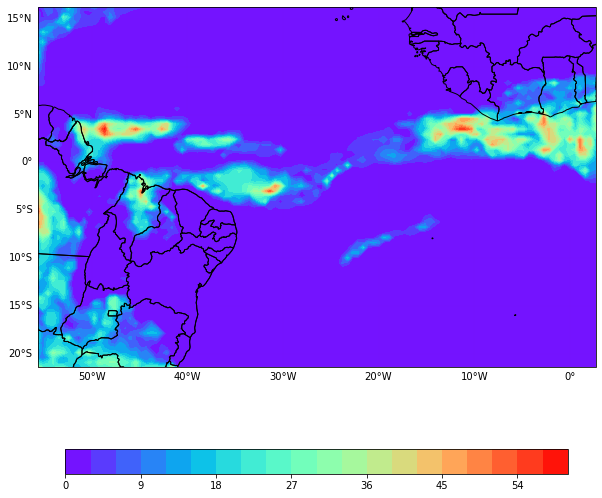

In [17]:
# plot usando sel time

fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=cartopy.crs.PlateCarree())

plot_pcp = pcp.sel(time='2021-03-20')

# Ceará
plt.contourf(
    plot_pcp.longitude,
    plot_pcp.latitude,
    plot_pcp,
    20,
    transform=cartopy.crs.PlateCarree(),
    cmap=plt.cm.rainbow
)

gl = ax.gridlines(
    crs=cartopy.crs.PlateCarree(),
    draw_labels=True,
    linewidth=0.01
)

gl.top_labels = False
gl.right_labels = False

# contorno dos estados
states = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    scale='50m', facecolor='none',
    name='admin_1_states_provinces_shp'
)
ax.add_feature(states, edgecolor='k')

# contorno dos países
countries = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    scale='50m', facecolor='none',
    name='admin_0_countries'
)
ax.add_feature(countries, edgecolor='k')

plt.colorbar(shrink=0.9, orientation='horizontal')

plt.show()

In [18]:
plt.close()

### Selecionando uma coordenada (ponto de grade)

In [19]:
pcp.latitude

<xarray.DataArray 'latitude' (latitude: 72)>
array([-21.397, -20.893, -20.387, -19.88 , -19.371, -18.861, -18.349, -17.835,
       -17.32 , -16.803, -16.285, -15.766, -15.246, -14.724, -14.2  , -13.676,
       -13.15 , -12.624, -12.096, -11.567, -11.037, -10.506,  -9.975,  -9.442,
        -8.909,  -8.375,  -7.84 ,  -7.304,  -6.768,  -6.231,  -5.694,  -5.156,
        -4.617,  -4.079,  -3.539,  -3.   ,  -2.46 ,  -1.92 ,  -1.38 ,  -0.84 ,
        -0.3  ,   0.241,   0.781,   1.321,   1.861,   2.401,   2.941,   3.48 ,
         4.019,   4.558,   5.097,   5.635,   6.172,   6.709,   7.245,   7.781,
         8.316,   8.85 ,   9.384,   9.916,  10.448,  10.979,  11.509,  12.038,
        12.566,  13.093,  13.618,  14.143,  14.666,  15.188,  15.709,  16.229])
Coordinates:
  * latitude  (latitude) float64 -21.4 -20.89 -20.39 ... 15.19 15.71 16.23
Attributes:
    units:      degrees_north
    long_name:  Latitude

In [20]:
pcp.longitude

<xarray.DataArray 'longitude' (longitude: 109)>
array([-55.637, -55.097, -54.557, -54.017, -53.477, -52.937, -52.397, -51.857,
       -51.317, -50.777, -50.237, -49.697, -49.157, -48.617, -48.077, -47.537,
       -46.997, -46.457, -45.917, -45.377, -44.837, -44.297, -43.757, -43.217,
       -42.677, -42.137, -41.597, -41.057, -40.517, -39.977, -39.437, -38.897,
       -38.357, -37.817, -37.277, -36.737, -36.197, -35.657, -35.117, -34.577,
       -34.037, -33.497, -32.957, -32.417, -31.877, -31.337, -30.797, -30.257,
       -29.717, -29.177, -28.637, -28.097, -27.557, -27.017, -26.477, -25.937,
       -25.397, -24.857, -24.317, -23.777, -23.237, -22.697, -22.157, -21.617,
       -21.077, -20.537, -19.997, -19.457, -18.917, -18.377, -17.837, -17.297,
       -16.757, -16.217, -15.677, -15.137, -14.597, -14.057, -13.517, -12.977,
       -12.437, -11.897, -11.357, -10.817, -10.277,  -9.737,  -9.197,  -8.657,
        -8.117,  -7.577,  -7.037,  -6.497,  -5.957,  -5.417,  -4.877,  -4.337,
        -3.797,  -3.257,  -2.717,  -2.177,  -1.637,  -1.097,  -0.557,  -0.017,
         0.523,   1.063,   1.603,   2.143,   2.683])
Coordinates:
  * longitude  (longitude) float64 -55.64 -55.1 -54.56 ... 1.603 2.143 2.683
Attributes:
    units:      degrees_east
    long_name:  Longitude

In [21]:
# Seleciona todos os passos de tempo na coordenada
pcp_plot = pcp.sel(latitude=-3, longitude=-24.857)

In [22]:
pcp_plot

<xarray.DataArray 'pcp' (time: 31)>
array([ 0.      ,  0.      ,  2.236004,  6.504014,  0.113015,  0.035935,
        9.410319,  0.      ,  0.      ,  0.      ,  0.015463,  0.040846,
        0.      ,  0.063958,  0.      ,  0.      ,  0.      ,  0.004771,
        8.974728,  0.      ,  0.      ,  0.      , 19.524967, 12.914154,
        0.106295,  0.      ,  0.      ,  0.      ,  0.      , 28.345507,
       26.921469], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2021-03-01 2021-03-02 ... 2021-03-31
    longitude  float64 -24.86
    latitude   float64 -3.0
Attributes:
    comments:           Unknown1 variable comment
    long_name:          rainfall
    units:              
    grid_name:          grid01
    grid_type:          generic
    level_description:  Earth surface
    time_statistic:     instantaneous

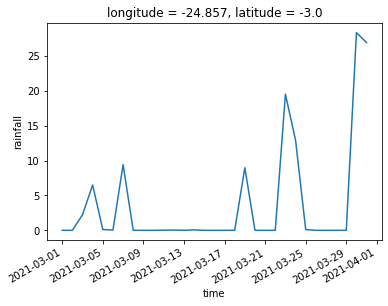

In [23]:
pcp_plot.plot()  # ou plt.plot(pcp_plot)

In [24]:
# Seleciona todos os passos de tempo na coordenada mais próxima (nearest)
pcp_plot = pcp.sel(latitude=-3.2, longitude=-24.1, method='nearest')

In [25]:
pcp_plot

<xarray.DataArray 'pcp' (time: 31)>
array([ 0.      ,  0.      ,  0.043526,  2.171843,  0.263503,  0.044124,
        7.191365,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.086238,  0.      ,  0.      ,  0.      ,  0.111985,
        9.647597,  0.      ,  0.      ,  0.      , 14.069994,  9.187608,
        0.149957,  0.      ,  0.      ,  0.      ,  0.      , 31.559776,
       12.901872], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2021-03-01 2021-03-02 ... 2021-03-31
    longitude  float64 -24.32
    latitude   float64 -3.0
Attributes:
    comments:           Unknown1 variable comment
    long_name:          rainfall
    units:              
    grid_name:          grid01
    grid_type:          generic
    level_description:  Earth surface
    time_statistic:     instantaneous

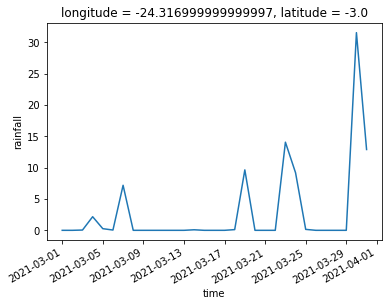

In [26]:
pcp_plot.plot()

In [27]:
# Seleciona passos de tempo na coordenada
pcp_plot = pcp.sel(latitude=-3, longitude=-24.857, time=slice('2021-03-01', '2021-03-10'))

In [28]:
pcp_plot

<xarray.DataArray 'pcp' (time: 10)>
array([0.      , 0.      , 2.236004, 6.504014, 0.113015, 0.035935, 9.410319,
       0.      , 0.      , 0.      ], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2021-03-01 2021-03-02 ... 2021-03-10
    longitude  float64 -24.86
    latitude   float64 -3.0
Attributes:
    comments:           Unknown1 variable comment
    long_name:          rainfall
    units:              
    grid_name:          grid01
    grid_type:          generic
    level_description:  Earth surface
    time_statistic:     instantaneous

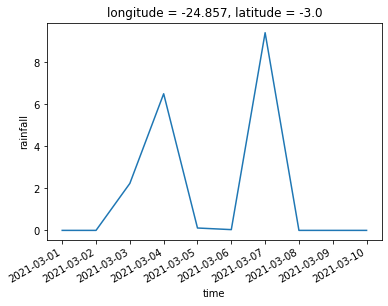

In [29]:
pcp_plot.plot()

### Selecionando uma região

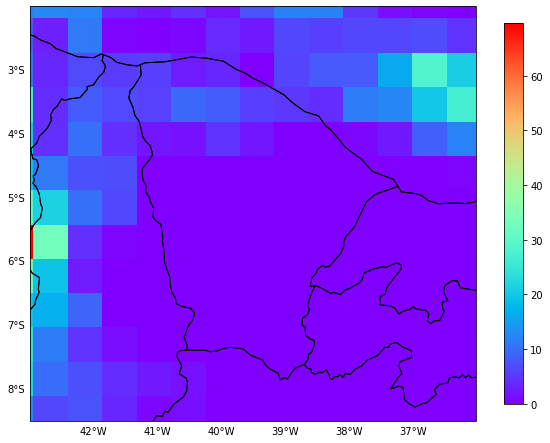

In [30]:
# plot selecionando uma região do mapa

fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=cartopy.crs.PlateCarree())

# Ceará
plot_pcp = pcp.sel(
    latitude=slice(-9.5, -1),
    longitude=slice(-44, -35),
    time='2021-03-07'
)

plt.pcolormesh(
    plot_pcp.longitude,
    plot_pcp.latitude,
    plot_pcp,
    cmap=plt.cm.rainbow,
    transform=cartopy.crs.PlateCarree()
)

gl = ax.gridlines(
    crs=cartopy.crs.PlateCarree(),
    draw_labels=True,
    linewidth=0.01
)

gl.top_labels = False
gl.right_labels = False

# contorno dos estados
states = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    scale='50m', facecolor='none',
    name='admin_1_states_provinces_shp'
)
ax.add_feature(states, edgecolor='k')

# contorno dos países
countries = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    scale='50m', facecolor='none',
    name='admin_0_countries'
)
ax.add_feature(countries, edgecolor='k')

ax.set_extent([-43, -36, -8.5, -2])

plt.colorbar(shrink=0.7, orientation='vertical')

plt.show()

# plt.savefig('meu_mapa.png')

In [31]:
plt.close()

# Exercício: (20 minutos)

### 1. Ler a base de dados do GPCP Versão 2.3 dispoível no site PSL NOAA.

### 2. Plotar o mapa de precipitação de Jan/2021 sobre o continente Africano.

### 3. Plotar o mapa de precipitação de Fev/2021 sobre a Austrália.